In [16]:
import pandas as pd
from pandas import read_csv
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# ML methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Iris classification


The example of Machine Learning project concerns Iris dataset that we analysed last week.

We wil try to classify data to each class (species) on the basic of sepal and petal lengths and widths with using most popular ML models.

So sepal and petal lengths and widths are our **independent values (features)**.

Class is our **dependent value (label)**.





## 1. Load and summarize your data


In [17]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
dataset = read_csv(url)
# head
print(dataset.head(20))

    5.1  3.5  1.4  0.2  Iris-setosa
0   4.9  3.0  1.4  0.2  Iris-setosa
1   4.7  3.2  1.3  0.2  Iris-setosa
2   4.6  3.1  1.5  0.2  Iris-setosa
3   5.0  3.6  1.4  0.2  Iris-setosa
4   5.4  3.9  1.7  0.4  Iris-setosa
5   4.6  3.4  1.4  0.3  Iris-setosa
6   5.0  3.4  1.5  0.2  Iris-setosa
7   4.4  2.9  1.4  0.2  Iris-setosa
8   4.9  3.1  1.5  0.1  Iris-setosa
9   5.4  3.7  1.5  0.2  Iris-setosa
10  4.8  3.4  1.6  0.2  Iris-setosa
11  4.8  3.0  1.4  0.1  Iris-setosa
12  4.3  3.0  1.1  0.1  Iris-setosa
13  5.8  4.0  1.2  0.2  Iris-setosa
14  5.7  4.4  1.5  0.4  Iris-setosa
15  5.4  3.9  1.3  0.4  Iris-setosa
16  5.1  3.5  1.4  0.3  Iris-setosa
17  5.7  3.8  1.7  0.3  Iris-setosa
18  5.1  3.8  1.5  0.3  Iris-setosa
19  5.4  3.4  1.7  0.2  Iris-setosa


#### As you can see our Dataframe doesn't containt headers so we will add it manually..

In [18]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# descriptions
print(dataset.describe())


(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

### Check if our classes are balanced...

In [19]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Summary:

Our features are numeric and out labels are strings (objects). 

Classes are balanced (50 samples for each). 



## 2. Visualize your data

### Box and whisker plots

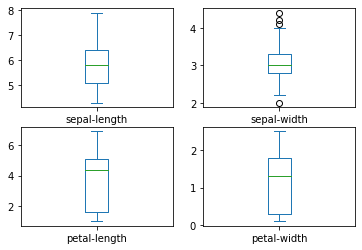

In [20]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Histograms

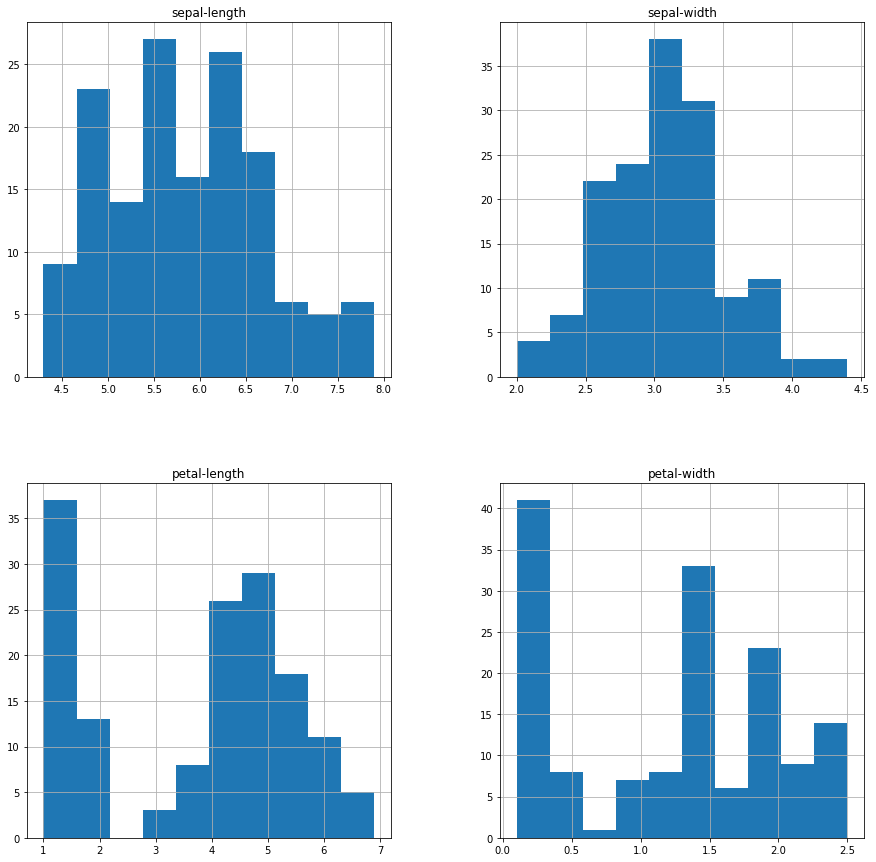

In [21]:
dataset.hist(figsize=[15,15])
plt.show()


### Scatter plot matrix

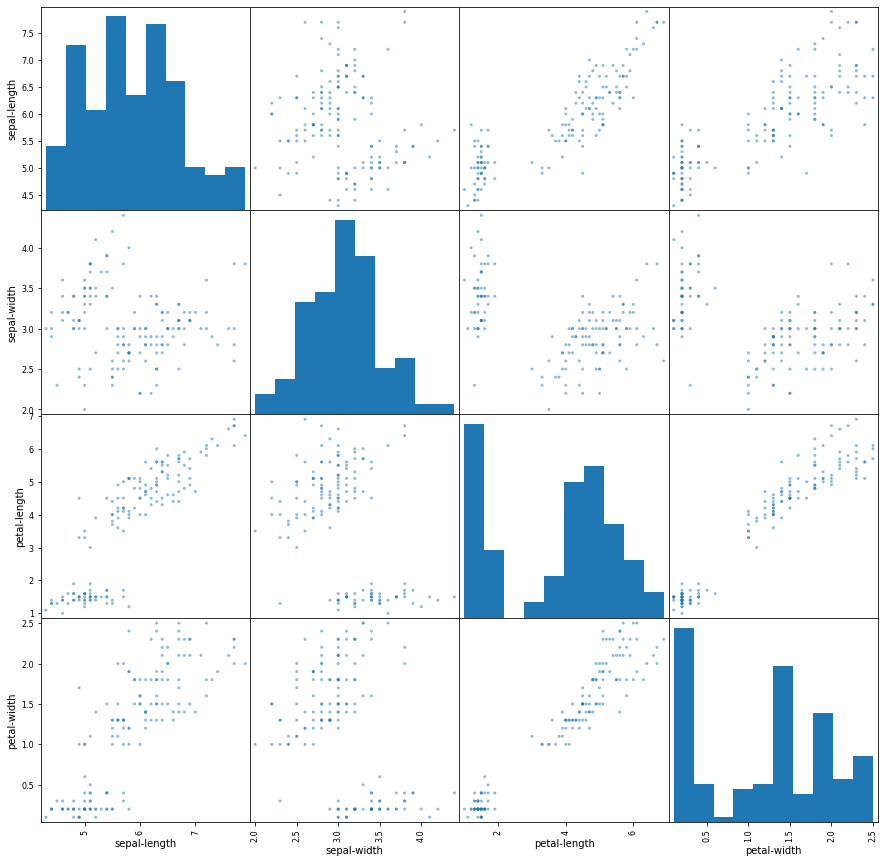

In [22]:
scatter_matrix(dataset, figsize=[15,15])
plt.show()

## 3. Preparing data

Typical data pre-processing may indclude following steps:

- Handling missing data (eliminating/estimating missing data)
- Dealing with unbalanced classes
- Feature encoding
- Feature scaling (normalization/standardization)
- #### Extract independent values
- #### Test / Validation Split


### Handing missing data 

In this case we don't have missing data so we can skip this step.

### Dealing with unbalanced classes

Our classes are perfectly balanced so we can skip this step.

### Feature encoding 

All of features in our dataset are numerical so we don't need to modify them

### Feature scaling

For the sake of simplicity we will skip this step in this example.

### Extract dependent/independent values

In [23]:
# 1) First method (working with DataFrames)

X = dataset.drop('class', axis=1)
y = dataset['class']

if isinstance(X,pd.core.frame.DataFrame): print('Our data are is the form of pandas DataFrame.')

print("Sample from the 1st row:")
X.iloc[0]



Our data are is the form of pandas DataFrame.
Sample from the 1st row:


sepal-length    5.1
sepal-width     3.5
petal-length    1.4
petal-width     0.2
Name: 0, dtype: float64

In [24]:
# 2) Second method (working with numpy arrays)
array = dataset.values
X = array[:,0:4]
y = array[:,4]
y = np.array([str(item) for item in y]) #change labels into string values

if isinstance(X,np.ndarray): print('Our data are is the form of numpy array.')

print("Sample from the 1st row:")
X[0]

Our data are is the form of numpy array.
Sample from the 1st row:


array([5.1, 3.5, 1.4, 0.2], dtype=object)

### Test / Validation Split

- x_train – features for the training data
- x_test – features for the test data
- y_train – labels for training data
- y_test – labels for testing data


train_test_split() method can handle both: numpy arrays or DataFrames:

In [25]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [26]:
print("Features (independent variables):")
print(X_train)

Features (independent variables):
[[6.1 3.0 4.6 1.4]
 [7.7 3.0 6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.0 1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.0 5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.0 2.2 5.0 1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.0 3.6 1.4 0.2]
 [4.8 3.0 1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.0 3.4 4.5 1.6]
 [7.7 2.8 6.7 2.0]
 [5.7 3.0 4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.0 2.0]
 [6.3 2.7 4.9 1.8]
 [4.8 3.0 1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.0 4.9 1.8]
 [6.5 3.2 5.1 2.0]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.0 3.0 4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.0 2.2 4.0 1.0]
 [6.4 2.9 4.3 1.3]
 [6.5 3.0 5.5 1.8]
 [5.0 2.3 3.3 1.0]
 [6.3 3.3 6.0 2.5]
 [5.5 2.5 4.0 1.3]
 [5.4 3.7 1.5 0.

In [27]:
print("Corresponding labels (dependent variables):")
print(Y_train)

Corresponding labels (dependent variables):
['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-vi

## 4. Building models and models evaluation technique



### Build Models


Let’s test 6 different algorithms (models):

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [28]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models



[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto'))]

### Evaluation technique

Due to a limited amount of data we will use k-fold cross-validation technique of evaluating models.
Hold-out method is a better choice when huge amount of data is available.

We will use stratified 10-fold cross validation to estimate model accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

#### Random seed

We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.

We are using the metric of ‘accuracy‘ to evaluate models.

In [29]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


## 5. Select the best model and improve its Accuracy with Algorithm Tuning 

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.98 or 98%.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

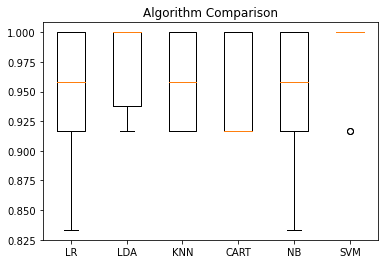

In [30]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Next we will plot a nice barplot with aim to visualize models comparison using seaborn library.

C:\Anaconda\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


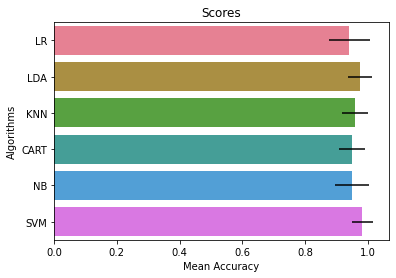

In [43]:
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms": names
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("Scores")

### Algorithm Tuning

Lets try to tune the KNN model with using of a grid search method.

In [44]:
from sklearn.model_selection import GridSearchCV


knn_model = KNeighborsClassifier()

# parameters that we will try to tune
params_knn = {'n_neighbors': range(2, 10),
                'weights': ('uniform', 'distance', ), },

param_search = GridSearchCV( estimator=knn_model, param_grid=params_knn,
                verbose=1)
                
param_search.fit(X_train, Y_train)

best_score = param_search.best_score_
best_params = param_search.best_params_

print(f'Best accuracy: {best_score} was obtained with parameters: {best_params}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best accuracy: 0.9666666666666668 was obtained with parameters: {'n_neighbors': 7, 'weights': 'uniform'}


As we can see we were able to improve the model accuracy from from 0.956 to 0.966.

We could also perform this procedure for all models. In order to prepare parameters for tuning you may read about models implementation in scikit-learn documentation. For example here for [KNeighborsClassifier]('https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).


## 6. Make and evaluate predictions

We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [33]:
final_model = KNeighborsClassifier(**best_params) 
final_model.fit(X_train, Y_train)
final_predictions = final_model.predict(X_validation)
#final_model.classes_


### Make predictions on a single sample

In [34]:
# element from dataset, e.g. 17
n = 17


# if you work with pandas DataFrame...
if isinstance(X_train, pd.core.frame.DataFrame):
    # single row containing features: 'sepal-length', 'sepal-width', 'petal-length', 'petal-width'
    x_example = X_train.iloc[n].values.reshape(1, -1)  
    y_true = np.array([Y_train.iloc[n]], dtype=object) # corresponding label (class) in this case: 'Iris-setosa'
# or with numpy array...
else:
    # single row containing features: 'sepal-length', 'sepal-width', 'petal-length', 'petal-width'
    x_example = X_train[n].reshape(1, -1)  
    y_true = np.array([Y_train[n]], dtype=object) # corresponding label (class) in this case: 'Iris-setosa'

y_predicted = final_model.predict(x_example)



print(f'{y_true[0]} sample with featues: \
        \n\tsepal length: {x_example[0][0]} \
        \n\tsepal width: {x_example[0][1]} \
        \n\tpepal length: {x_example[0][2]} \
        \n\tpepal width: {x_example[0][3]}\n')
if y_true==y_predicted[0]:
    print(f'correctly classified as {y_predicted[0]}')
else: 
    print(f'inorrectly classified as {y_predicted[0]}')


Iris-setosa sample with featues:         
	sepal length: 5.0         
	sepal width: 3.6         
	pepal length: 1.4         
	pepal width: 0.2

correctly classified as Iris-setosa


You may also try to test on data that are from outside of dataset (custom features collection).


In [35]:
custom_example = np.array([2.7, 7.0, 8.1, 4.3]).reshape(1, -1)
c_predicted = final_model.predict(custom_example)

c_predicted

array(['Iris-virginica'], dtype='<U15')

### Probability predictions

Another type of prediction you may wish to make is the probability of the data instance belonging to each class.

This is called a probability prediction where given a new instance, the model returns the probability for each outcome class as a value between 0 and 1.

In [36]:
# element from dataset, e.g. 17
n = 30


# if you work with pandas DataFrame...
if isinstance(X_train, pd.core.frame.DataFrame):
    # single row containing features: 'sepal-length', 'sepal-width', 'petal-length', 'petal-width'
    x_example = X_train.iloc[n].values.reshape(1, -1)  
    y_true = np.array([Y_train.iloc[n]], dtype=object) # corresponding label (class) in this case: 'Iris-setosa'
# or with numpy array...
else:
    # single row containing features: 'sepal-length', 'sepal-width', 'petal-length', 'petal-width'
    x_example = X_train[n].reshape(1, -1)  
    y_true = np.array([Y_train[n]], dtype=object) # corresponding label (class) in this case: 'Iris-setosa'


y_predicted = final_model.predict_proba(x_example)



print(f'{y_true[0]} sample with featues: \
        \n \tsepal length: {x_example[0][0]} \
        \n\tsepal width: {x_example[0][1]} \
        \n\tpepal length: {x_example[0][2]} \
        \n\tpepal width: {x_example[0][3]}\n')
print(f'classified as:\n\t{final_model.classes_[0]} with probability: {y_predicted[0][0]} \
            \n\t{final_model.classes_[1]} with probability: {y_predicted[0][1]} \
            \n\t{final_model.classes_[2]} with probability: {y_predicted[0][2]}')

Iris-setosa sample with featues:         
 	sepal length: 4.8         
	sepal width: 3.4         
	pepal length: 1.6         
	pepal width: 0.2

classified as:
	Iris-setosa with probability: 1.0             
	Iris-versicolor with probability: 0.0             
	Iris-virginica with probability: 0.0


In [37]:
custom_example = np.array([2.9, 100.0, 8.1, 4.3]).reshape(1, -1)
c_predicted = final_model.predict_proba(custom_example)

print(f'Sample with featues: \
    \n\tsepal length: {custom_example[0][0]} \
    \n\tsepal width: {custom_example[0][1]} \
    \n\tpepal length: {custom_example[0][2]} \
    \n\tpepal width: {custom_example[0][3]}\n')
print(f'classified as:\n\t{final_model.classes_[0]} with probability: {c_predicted[0][0]} \
    \n\t{final_model.classes_[1]} with probability: {c_predicted[0][1]} \
    \n\t{final_model.classes_[2]} with probability: {c_predicted[0][2]}')

Sample with featues:     
	sepal length: 2.9     
	sepal width: 100.0     
	pepal length: 8.1     
	pepal width: 4.3

classified as:
	Iris-setosa with probability: 0.7142857142857143     
	Iris-versicolor with probability: 0.0     
	Iris-virginica with probability: 0.2857142857142857


### Evaluate predictions

Now we want to get an idea of the accuracy of the model **on our validation set**.

This will give us an independent final check on the accuracy of the model. 

We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.


In [38]:
print(accuracy_score(Y_validation, final_predictions))
print(confusion_matrix(Y_validation, final_predictions))
print(classification_report(Y_validation, final_predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

Finally we can use plot the cofusion matrix with nice visualisation:

Confusion matrix, without normalization
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


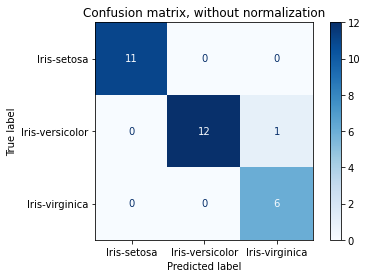

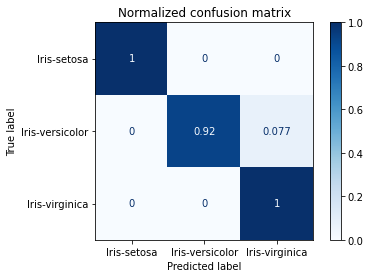

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        final_model,
        X_validation,
        Y_validation,
        display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## 7. Save your model

You can save your model on your disc in order to use it in the future (instead od repeating whole data preparing, trainig, tuning process).

In [40]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))


### Use your saved model

In [41]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)

0.9666666666666667


In [42]:
custom_example = np.array([42.9, 100.0, 13.1, 0.3]).reshape(1, -1)
c_predicted = loaded_model.predict_proba(custom_example)

print(f'Sample with featues: \
    \n\tsepal length: {custom_example[0][0]} \
    \n\tsepal width: {custom_example[0][1]} \
    \n\tpepal length: {custom_example[0][2]} \
    \n\tpepal width: {custom_example[0][3]}\n')
print(f'classified as:\n\t{final_model.classes_[0]} with probability: {c_predicted[0][0]} \
    \n\t{final_model.classes_[1]} with probability: {c_predicted[0][1]} \
    \n\t{final_model.classes_[2]} with probability: {c_predicted[0][2]}')

Sample with featues:     
	sepal length: 42.9     
	sepal width: 100.0     
	pepal length: 13.1     
	pepal width: 0.3

classified as:
	Iris-setosa with probability: 0.14285714285714285     
	Iris-versicolor with probability: 0.0     
	Iris-virginica with probability: 0.8571428571428571
